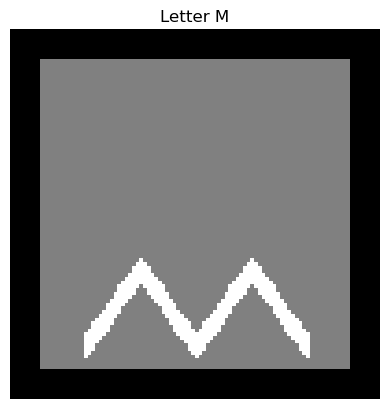

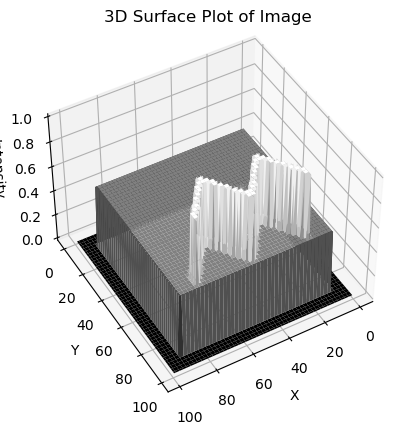

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define image dimensions
image_size = 100

# Create an empty image with all zeros
image = np.zeros((image_size, image_size))

# Define the coordinates for the letter "M"
M_coords = np.array([
    [20, 85],
    [35, 65],
    [50, 85],
    [65, 65],
    [80, 85]
])

# Add a surrounding square with the value of 0.5 (gray)
image[8:92, 8:92] = 0.5

# Add an outer square with the value of 0 (black)
image[[0, 1, 2, 3, 4, 95, 96, 97, 98, 99], :] = 0
image[:, [0, 1, 2, 3, 4, 95, 96, 97, 98, 99]] = 0

# Draw the letter "M" by setting corresponding pixels to 1 (white)
thickness = 3  # Set the desired thickness
for i in range(len(M_coords) - 1):
    x1, y1 = M_coords[i]
    x2, y2 = M_coords[i + 1]
    line_points = np.zeros((max(abs(x2 - x1), abs(y2 - y1)), 2))
    line_points[:, 0] = np.round(np.linspace(x1, x2, len(line_points)))
    line_points[:, 1] = np.round(np.linspace(y1, y2, len(line_points)))
    for j in range(len(line_points)):
        x = int(line_points[j, 0])
        y = int(line_points[j, 1])
        y_range = np.clip(range(max(1, y - thickness), min(image_size, y + thickness + 1)), 0, image_size - 1)
        image[y_range, x] = 1  # Make the letter thicker

# Display the image
plt.imshow(image, cmap='gray')
plt.title("Letter M")
plt.axis('off')
plt.show()

# 3D Surface Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(range(image_size), range(image_size))
surf = ax.plot_surface(x, y, image, cmap='gray')

# Set initial viewing angle
ax.view_init(elev=45, azim=60)

# Customize plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
plt.title("3D Surface Plot of Image")

plt.show()